<a href="https://colab.research.google.com/github/behrangEhi/ML-DL-Projects/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction to Time Series

### 1.1 Stationary

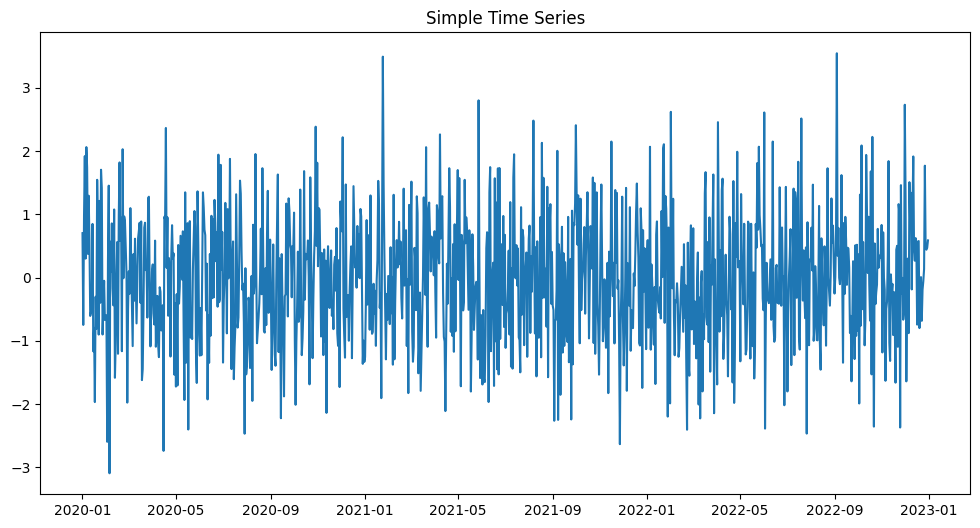

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a simple time series
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
ts = pd.Series(np.random.randn(len(dates)), index=dates)

plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title('Simple Time Series')
plt.show()

### 1.2 Adding a trend

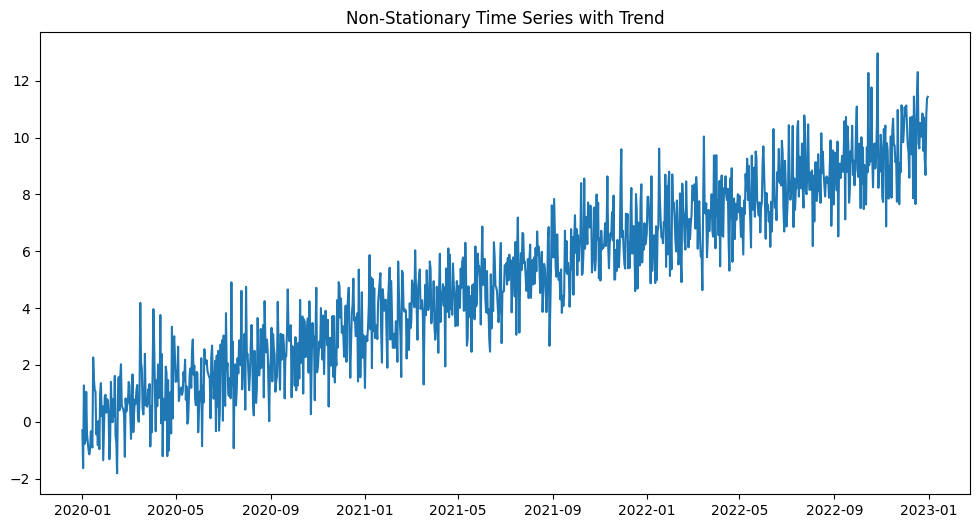

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a non-stationary time series with a trend
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
n = len(dates)
trend = np.linspace(0, 10, n)  # Linear trend from 0 to 10
noise = np.random.randn(n)
ts = pd.Series(trend + noise, index=dates)

plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title('Non-Stationary Time Series with Trend')
plt.show()

### 1.3 Adding seasonality

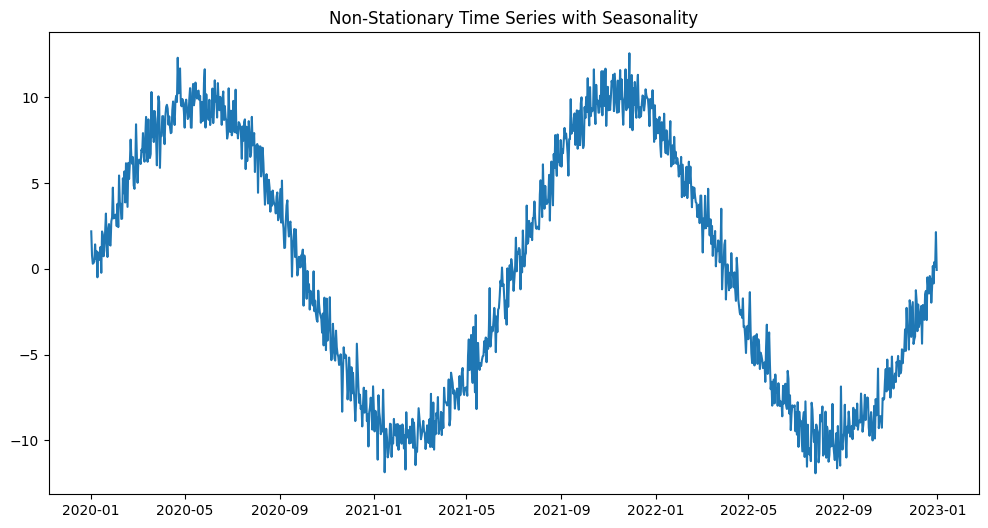

In [ ]:
# Create a non-stationary time series with seasonality
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
n = len(dates)
seasonality = 10 * np.sin(np.linspace(0, 4*np.pi, n))  # Seasonal component
noise = np.random.randn(n)
ts = pd.Series(seasonality + noise, index=dates)

plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title('Non-Stationary Time Series with Seasonality')
plt.show()

### 1.4 Combining trend and seasonality

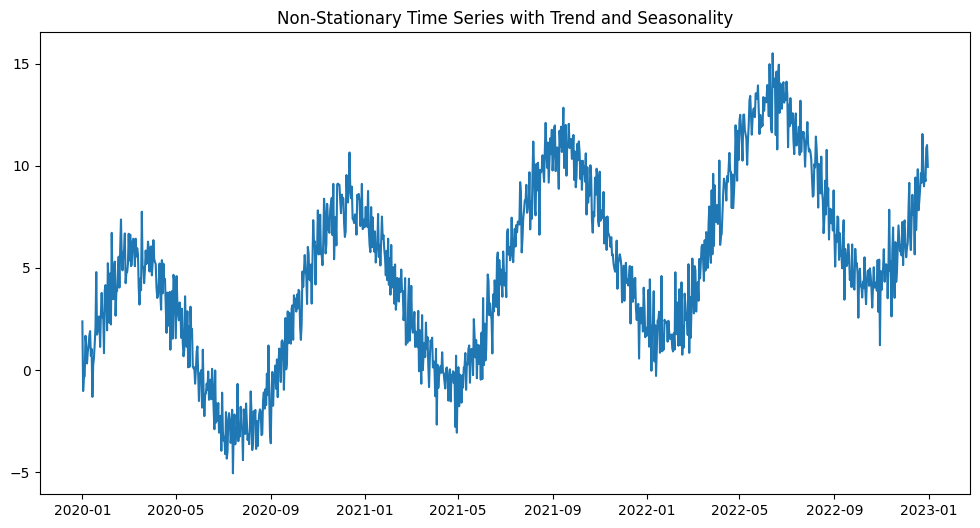

In [ ]:
# Create a non-stationary time series with trend and seasonality
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
n = len(dates)
trend = np.linspace(0, 10, n)
seasonality = 5 * np.sin(np.linspace(0, 8*np.pi, n))
noise = np.random.randn(n)
ts = pd.Series(trend + seasonality + noise, index=dates)

plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title('Non-Stationary Time Series with Trend and Seasonality')
plt.show()

### 1.5 Creating a random walk (non-stationary due to changing mean)

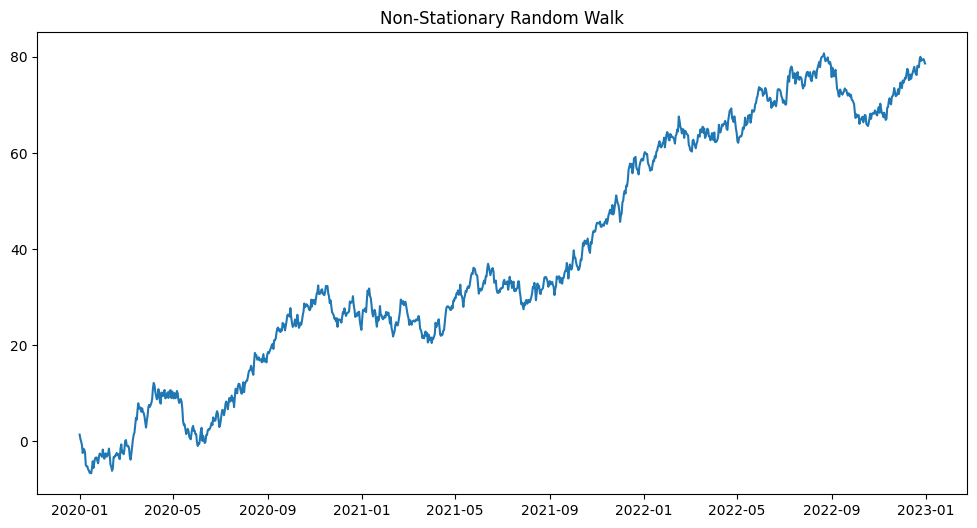

In [ ]:
# Create a non-stationary random walk
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
n = len(dates)
random_walk = np.cumsum(np.random.randn(n))
ts = pd.Series(random_walk, index=dates)

plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title('Non-Stationary Random Walk')
plt.show()

### 1.6 Introducing changing variance

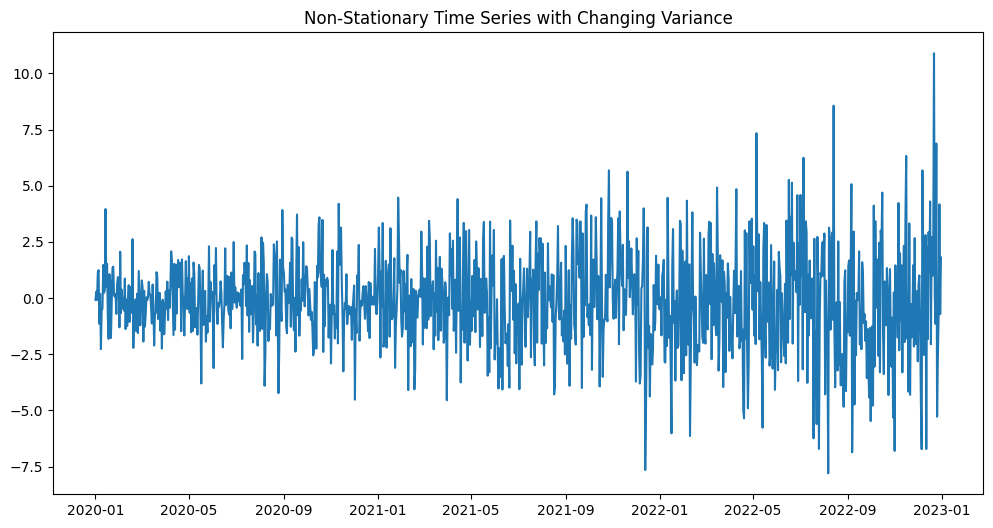

In [ ]:
# Create a non-stationary time series with changing variance
dates = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D')
n = len(dates)
changing_variance = np.random.randn(n) * np.linspace(1, 3, n)
ts = pd.Series(changing_variance, index=dates)

plt.figure(figsize=(12,6))
plt.plot(ts)
plt.title('Non-Stationary Time Series with Changing Variance')
plt.show()

## 2. Stationarity Test

ADF Statistic:
This is the test statistic calculated from data. A more negative value suggests stronger evidence for stationarity.

Critical Values:
These are the threshold values for different significance levels. If the ADF statistic is more negative than these values, we reject the null hypothesis at that significance level.



Interpretation:
1. "Strong evidence against the null hypothesis": This means the data strongly suggests that the time series is stationary.
2. "Reject the null hypothesis": We are rejecting the hypothesis that the time series has a unit root (is non-stationary).
3. "Data has no unit root and is stationary": This is the conclusion based on the test results.


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

# Test the time series
test_stationarity(ts)

ADF Statistic: -0.4167085449654664
p-value: 0.907271448462839
Critical Values: {'1%': -3.436459052172655, '5%': -2.864237372528562, '10%': -2.568206176974609}
Weak evidence against null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


## 3. Autoregressive (AR) Model

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1096
Model:                     AutoReg(1)   Log Likelihood               -1945.401
Method:               Conditional MLE   S.D. of innovations              1.430
Date:                Wed, 30 Oct 2024   AIC                           3896.803
Time:                        12:03:25   BIC                           3911.799
Sample:                    01-02-2020   HQIC                          3902.477
                         - 12-31-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5912      0.083      7.118      0.000       0.428       0.754
y.L1           0.8841      0.014     62.423      0.000       0.856       0.912
                                    Roots           

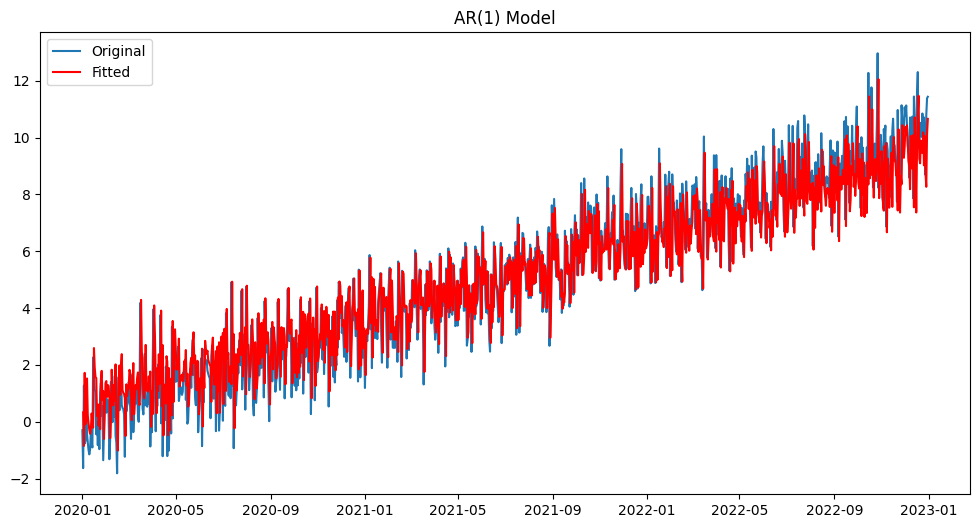

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

# Fit AR model
model = AutoReg(ts, lags=1)
results = model.fit()

# Print summary
print(results.summary())

# Plot original series and fitted values
plt.figure(figsize=(12,6))
plt.plot(ts, label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.title('AR(1) Model')
plt.show()

## 4. Moving Average (MA) Model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1096
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2428.086
Date:                Wed, 30 Oct 2024   AIC                           4862.172
Time:                        12:03:42   BIC                           4877.170
Sample:                    01-01-2020   HQIC                          4867.847
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0148      0.109     45.951      0.000       4.801       5.229
ma.L1          0.6311      0.026     24.331      0.000       0.580       0.682
sigma2         4.9158      0.240     20.491      0.0

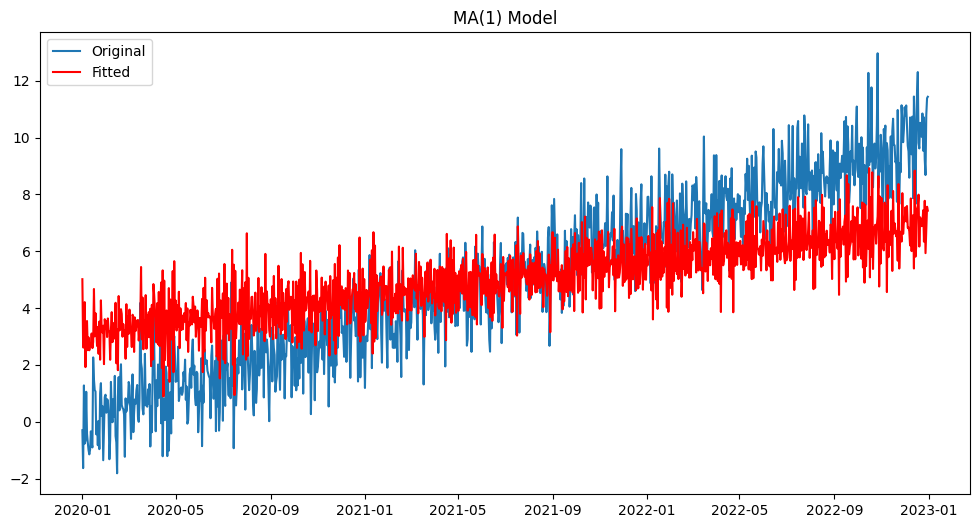

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit MA model (ARIMA with p=0, d=0)
model = ARIMA(ts, order=(0, 0, 1))
results = model.fit()

# Print summary
print(results.summary())

# Plot original series and fitted values
plt.figure(figsize=(12,6))
plt.plot(ts, label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.title('MA(1) Model')
plt.show()

## 5. ARMA Model


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1096
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1640.700
Date:                Wed, 30 Oct 2024   AIC                           3289.400
Time:                        12:03:50   BIC                           3309.398
Sample:                    01-01-2020   HQIC                          3296.967
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0280      4.975      1.011      0.312      -4.722      14.778
ar.L1          0.9999      0.000   2598.945      0.000       0.999       1.001
ma.L1         -0.9349      0.012    -79.614      0.0

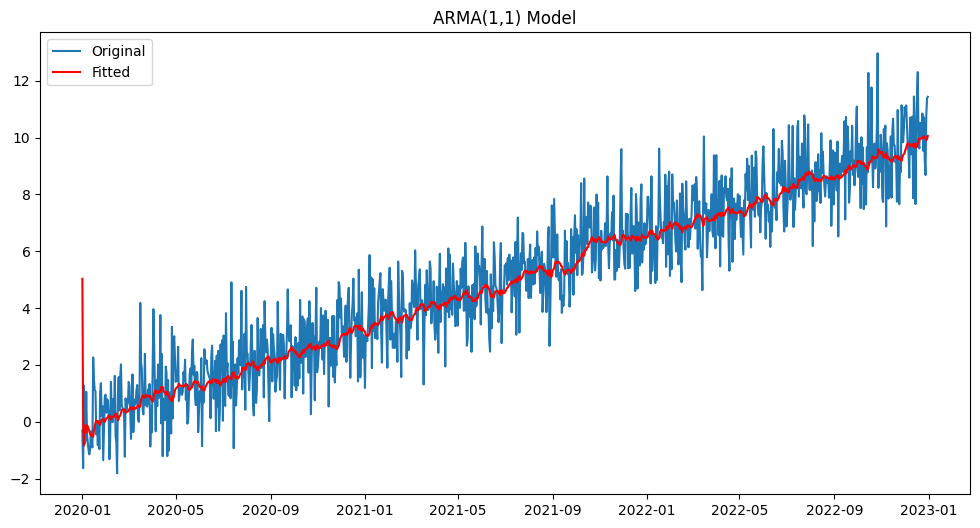

In [ ]:
# Fit ARMA model
model = ARIMA(ts, order=(1, 0, 1))
results = model.fit()

# Print summary
print(results.summary())

# Plot original series and fitted values
plt.figure(figsize=(12,6))
plt.plot(ts, label='Original')
plt.plot(results.fittedvalues, color='red', label='Fitted')
plt.legend()
plt.title('ARMA(1,1) Model')
plt.show()

## 6. ARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1096
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1640.048
Date:                Wed, 30 Oct 2024   AIC                           3286.097
Time:                        12:04:42   BIC                           3301.092
Sample:                    01-01-2020   HQIC                          3291.771
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   9367.830      0.000       1.000       1.000
ma.L1         -0.9350      0.012    -78.655      0.000      -0.958      -0.912
sigma2         1.1645      0.049     23.961      0.0

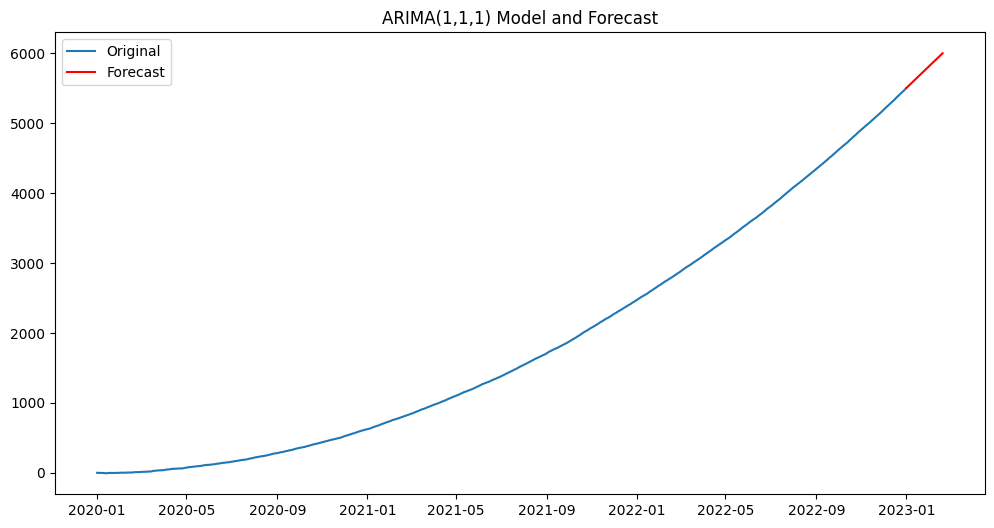

In [ ]:
# Create non-stationary series
non_stationary_ts = ts.cumsum()

# Fit ARIMA model
model = ARIMA(non_stationary_ts, order=(1, 1, 1))
results = model.fit()

# Print summary
print(results.summary())

# Forecast
forecast = results.forecast(steps=50)

# Plot original series and forecast
plt.figure(figsize=(12,6))
plt.plot(non_stationary_ts, label='Original')
plt.plot(forecast, color='red', label='Forecast')
plt.legend()
plt.title('ARIMA(1,1,1) Model and Forecast')
plt.show()

## 7. Model Selection


In [ ]:
def select_best_model(data, max_p, max_d, max_q):
    best_aic = float('inf')
    best_order = None
    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(data, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue
    return best_order

best_order = select_best_model(non_stationary_ts, 2, 2, 2)
print(f"Best ARIMA order: {best_order}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/st

Best ARIMA order: (0, 2, 1)


## 8. Practical Application